# LightGBM을 사용한 ML(폐업률 평균값 기준으로 이진분류)

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
# 데이터 로드
df = pd.read_csv('../../eda/data/merged_data.csv')

In [329]:
df.head()

,기준_년분기_코드,자치구_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,강남구,PC방,122.0,132.0,9.8,13.0,6.8,9.0,10.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
1,20191,강남구,가구,435.0,436.0,2.8,12.0,0.7,3.0,1.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
2,20191,강남구,가방,279.0,280.0,4.3,12.0,3.6,10.0,1.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
3,20191,강남구,가전제품,163.0,163.0,1.8,3.0,1.2,2.0,0.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
4,20191,강남구,가전제품수리,92.0,92.0,3.3,3.0,1.1,1.0,0.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Columns: 137 entries, 기준_년분기_코드 to 여성연령대_60_이상_직장_인구_수
dtypes: float64(132), int64(2), object(3)
memory usage: 41.8+ MB


In [331]:
df.describe()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,3.997500e+04,...,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000
mean,20220.096635,320.453959,353.995822,2.971897,11.176735,2.589829,9.794196,33.541864,1.553588e+10,5.749521e+05,...,27142.451857,26395.847330,19736.054484,9543.760350,223.790644,15057.239225,17365.139937,13473.701138,10014.440951,4391.736785
std,18.764856,624.817403,648.030094,2.385172,21.887316,2.001541,19.292389,71.256850,4.679056e+10,1.482439e+06,...,39941.977062,36960.317249,24219.922727,9600.950081,399.065330,22371.870231,24534.250632,16564.421275,11715.352615,4832.596737
min,20191.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135000e+03,2.000000e+00,...,1169.000000,1978.000000,2704.000000,2245.000000,0.000000,635.000000,1180.000000,1674.000000,1663.000000,257.000000
25%,20203.000000,94.000000,105.000000,1.300000,2.000000,1.200000,2.000000,0.000000,1.197476e+09,1.463000e+04,...,5590.000000,5799.000000,5397.000000,3928.000000,0.000000,3138.000000,3795.000000,4042.000000,3856.000000,1695.000000
50%,20221.000000,161.000000,188.000000,2.600000,5.000000,2.300000,4.000000,4.000000,4.114511e+09,7.159500e+04,...,9123.000000,10094.000000,10122.000000,5924.000000,39.000000,5068.000000,6673.000000,6807.000000,5695.000000,2678.000000
75%,20234.000000,313.000000,357.000000,4.200000,12.000000,3.600000,10.000000,27.000000,1.251953e+10,3.641125e+05,...,24849.000000,24451.000000,18373.000000,10207.000000,209.000000,21296.000000,21114.000000,14062.000000,8866.000000,4775.000000
max,20252.000000,17827.000000,17845.000000,43.600000,773.000000,33.300000,554.000000,688.000000,1.399137e+12,2.716973e+07,...,204697.000000,188865.000000,116356.000000,51339.000000,1679.000000,114671.000000,124729.000000,86333.000000,63848.000000,26816.000000


In [332]:
# 중복 및 결측치 확인
dupes = df.duplicated(subset=["기준_년분기_코드", "자치구_코드_명", "서비스_업종_코드_명"]).sum()
df_null = df.isnull().sum()
print(f"중복된 행 개수: {dupes}")
print(f"결측치 확인: {df_null}")

중복된 행 개수: 0
결측치 확인: 기준_년분기_코드              0
자치구_코드_명               0
서비스_업종_코드_명            0
점포_수                   0
유사_업종_점포_수             0
                      ..
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
Length: 137, dtype: int64


In [339]:
df['서비스_업종_코드_명'].nunique()

63

In [333]:
# 0) 기본 설정
KEY_G = "자치구_코드_명"            # 지역/자치구 식별 컬럼
KEY_S = "서비스_업종_코드_명"       # 업종 식별 컬럼
KEY_Q = "기준_년분기_코드"          # 분기 코드(시계열 분할 기준)
TARGET_CONT = "폐업_률"            # 라벨 기준으로 쓸 연속 지표(분기별 평균)

DECISION_THR = 0.50               # 예측 확률 → 0/1 구분 임계값

In [334]:
# 1) 라벨 만들기: "분기별 폐업_률 평균" 기준으로 t+1 시프트
#    - 분기별 평균(thr)을 계산 → 현재 분기의 폐업_률이 평균 이상이면 1
#    - (상점/업종) 그룹 단위로 t+1로 시프트해서 y 생성
df = df.sort_values([KEY_G, KEY_S, KEY_Q]).copy()

# 분기별 평균(=thr) 계산
thr_by_q = df.groupby(KEY_Q)[TARGET_CONT].mean().rename("thr")
df = df.merge(thr_by_q, left_on=KEY_Q, right_index=True, how="left")

# 현재 분기의 high/low (평균 이상=1)
df["is_high_t"] = (df[TARGET_CONT] >= df["thr"]).astype(int)

# t+1 라벨 만들기 (그룹별로 다음 분기의 high 여부)
df["y"] = df.groupby([KEY_G, KEY_S])["is_high_t"].shift(-1)
df = df[df["y"].notna()].copy()
df["y"] = df["y"].astype(int)

print("라벨 1 비율(양성 비율):", df["y"].mean().round(4))

라벨 1 비율(양성 비율): 0.4346


In [335]:
# 2) 피처 선택 (누수 방지: 타깃 관련 컬럼/파생 제거)
#    - 모델 입력 X에는 '폐업'이 들어간 컬럼은 제외(라벨과 직접 관련 → 누수 가능)
#    - 카테고리 컬럼은 category dtype으로 지정해서 LightGBM에 그대로 전달

drop_cols = {"y", "thr", "is_high_t", TARGET_CONT}
# '폐업' 들어간 모든 컬럼은 안전하게 제외 (누수 방지)
leak_cols = [c for c in df.columns if "폐업" in c]
drop_cols.update(leak_cols)

# 숫자형 피처
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in drop_cols]

# 범주형 피처
cat_cols = [c for c in [KEY_G, KEY_S, "상권_변화_지표"] if c in df.columns and c not in drop_cols]
for c in cat_cols:
    df[c] = df[c].astype("category")

feature_cols = num_cols + cat_cols
print("사용 피처 수:", len(feature_cols))

사용 피처 수: 133


In [336]:
# 3) 시계열 분할: 마지막 분기 → 테스트, 그 이전 → 학습
#    - 학습 내부에서 마지막-1 분기를 검증으로 사용(early stopping 용)
from sklearn.model_selection import train_test_split

last_q = df[KEY_Q].max()
train_df = df[df[KEY_Q] < last_q].copy()
test_df  = df[df[KEY_Q] == last_q].copy()

# 학습 구간에서 "마지막 분기"를 검증으로 사용 (학습용에서 한 분기 떼어냄)
if train_df[KEY_Q].nunique() >= 2:
    val_q = train_df[KEY_Q].max()
    val_df = train_df[train_df[KEY_Q] == val_q].copy()
    trn_df = train_df[train_df[KEY_Q] <  val_q].copy()
else:
    # 학습 분기가 1개뿐이라면, 간단히 90:10 랜덤 분할
    trn_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["y"])

X_tr, y_tr = trn_df[feature_cols], trn_df["y"]
X_val, y_val = val_df[feature_cols], val_df["y"]
X_te, y_te   = test_df[feature_cols], test_df["y"]

In [337]:
# 4) LightGBM 모델 학습

import lightgbm as lgb

model = lgb.LGBMClassifier(
    objective="binary",
    boosting="gbdt",
    learning_rate=0.05,
    n_estimators=6000,            
    num_leaves=35,                # 31~35 권장
    max_depth=10,
    min_data_in_leaf=300,         # 220~300에서 스윕 가능
    min_split_gain=0.12,          # 0.10~0.15 범위
    reg_lambda=14.0,              # 12~16 범위
    reg_alpha=3.5,                # 3~5 범위
    feature_fraction=0.76,        # 0.75~0.80
    bagging_fraction=0.82,
    bagging_freq=3,
    class_weight={0: 1.0, 1: 2.0},  # 2.0~2.5 스윕 권장
    n_jobs=-1,
    random_state=42,
    verbosity=-1
)


model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric=["auc", "average_precision"],
    callbacks=[
        lgb.early_stopping(stopping_rounds=200, verbose=False),
        lgb.log_evaluation(period=200)
    ],
    categorical_feature=[c for c in cat_cols if c in X_tr.columns]
)

[200]	valid_0's auc: 0.789216	valid_0's average_precision: 0.757836	valid_0's binary_logloss: 0.576891


LGBMClassifier(bagging_fraction=0.82, bagging_freq=3, boosting='gbdt',
               class_weight={0: 1.0, 1: 2.0}, feature_fraction=0.76,
               learning_rate=0.05, max_depth=10, min_data_in_leaf=300,
               min_split_gain=0.12, n_estimators=6000, n_jobs=-1, num_leaves=35,
               objective='binary', random_state=42, reg_alpha=3.5,
               reg_lambda=14.0, verbosity=-1)

In [ ]:
# 5) 평가 (임계값 0.50 기준 + ROC/PR AUC)

from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score
)

proba_te = model.predict_proba(X_te)[:, 1]
pred_te  = (proba_te >= DECISION_THR).astype(int)

# 임계값 기반 지표
acc  = accuracy_score(y_te, pred_te)
prec = precision_score(y_te, pred_te, zero_division=0)
rec  = recall_score(y_te, pred_te, zero_division=0)
f1   = f1_score(y_te, pred_te, zero_division=0)

# 확률 기반 지표
roc_auc = roc_auc_score(y_te, proba_te) if y_te.nunique() > 1 else np.nan
pr_auc  = average_precision_score(y_te, proba_te) if y_te.nunique() > 1 else np.nan

# 결과 출력
print(f"ACC : {acc:.4f}")
print(f"PREC : {prec:.4f}")
print(f"RECALL : {rec:.4f}")
print(f"F1 : {f1:.4f}")
print(f"ROC-AUC : {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f}")

ACC : 0.7286
PREC : 0.6704
RECALL : 0.7805
F1 : 0.7213
ROC-AUC : 0.8138
PR-AUC : 0.7926


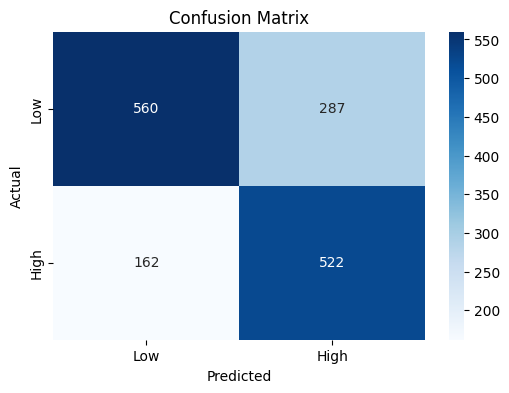

In [ ]:
# 혼동 행렬 시각화
# 검증 데이터 기준
from sklearn.metrics import confusion_matrix

thr = 0.50  # 팀에서 합의한 임계값
proba_val = model.predict_proba(X_val)[:, 1]
pred_val  = (proba_val >= thr).astype(int)

cm = confusion_matrix(y_val, pred_val, labels=[0, 1])

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

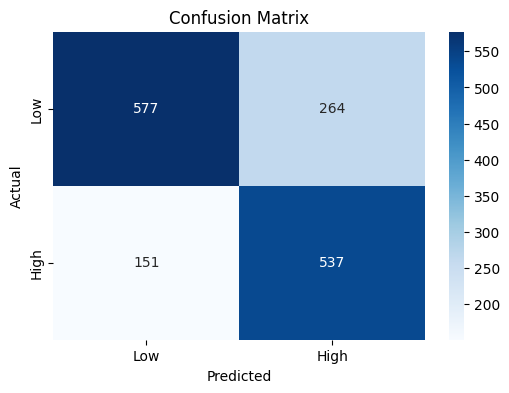

In [ ]:
# 테스트 데이터 기준
thr = 0.50  # 팀에서 합의한 임계값
proba_te = model.predict_proba(X_te)[:, 1]
pred_te  = (proba_te >= thr).astype(int)

cm = confusion_matrix(y_te, pred_te, labels=[0, 1])

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

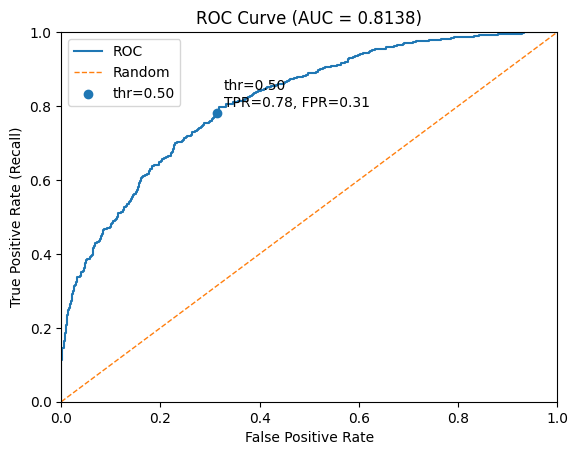

In [ ]:
# 6) ROC 커브 시각화
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# y_te: 실제 라벨(0/1), proba_te: 예측 확률(양성 클래스)
thr = 0.50  # 팀 기준 임계값

# ROC 좌표와 AUC
fpr, tpr, roc_thr = roc_curve(y_te, proba_te)
auc = roc_auc_score(y_te, proba_te)

# 현재 임계값(0.50)에서의 점 (TPR/Recall, FPR 계산)
pred_te = (proba_te >= thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_te, pred_te).ravel()
fpr_t = fp / (fp + tn) if (fp + tn) > 0 else 0.0
tpr_t = tp / (tp + fn) if (tp + fn) > 0 else 0.0

# 그래프 생성
plt.figure()
plt.plot(fpr, tpr, label="ROC")
plt.plot([0, 1], [0, 1], "--", linewidth=1, label="Random")
plt.scatter([fpr_t], [tpr_t], label=f"thr={thr:.2f}")
plt.annotate(f"thr={thr:.2f}\nTPR={tpr_t:.2f}, FPR={fpr_t:.2f}",
             (fpr_t, tpr_t), xytext=(5,5), textcoords="offset points")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"ROC Curve (AUC = {auc:.4f})")
plt.xlim(0, 1); plt.ylim(0, 1)
plt.legend()
plt.show()

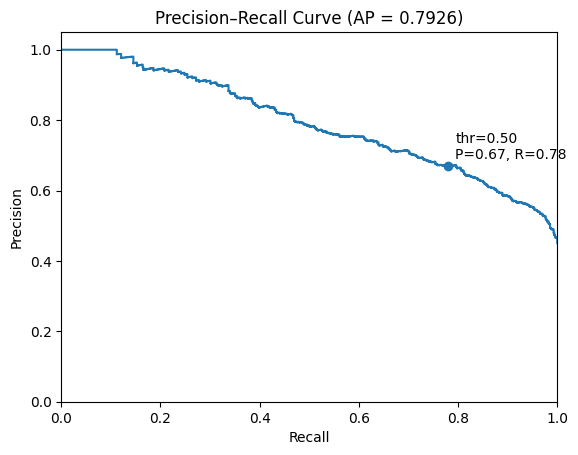

In [ ]:
# 7) PR 커브 시각화
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score

# y_te: 실제 라벨(0/1), proba_te: 예측 확률(양성 클래스)
thr = 0.50  # 임계값(팀 기준에 맞게 0.50)

# PR-curve 좌표와 AP 계산
prec, rec, thr_grid = precision_recall_curve(y_te, proba_te)
ap = average_precision_score(y_te, proba_te)

# 현재 임계값(0.50)에서의 Precision/Recall 계산
pred_te = (proba_te >= thr).astype(int)
p_t = precision_score(y_te, pred_te, zero_division=0)
r_t = recall_score(y_te, pred_te, zero_division=0)

# 그래프 생성
plt.figure()
plt.step(rec, prec, where='post')                # PR-curve
plt.scatter([r_t], [p_t])                        # 현재 임계값 점 표시
plt.annotate(f"thr={thr:.2f}\nP={p_t:.2f}, R={r_t:.2f}",
             (r_t, p_t), xytext=(5,5), textcoords='offset points')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {ap:.4f})")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.show()